In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset   
import matplotlib.pylab as pl
import matplotlib.patheffects as pe

import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   :  16}

matplotlib.rc('font', **font)


In [25]:
f = Dataset('Data/GBR_RSL_2.nc')
lon,lat = f['lon'],f['lat'] #load longitude and latitude
time = f['time']
RSL_GIA,RSL_all = f['GIA'],f['RSL'] #load RSL caused by GIA and GIA+SIA
shoreline = np.load('Data/CS_all.npy') #load the coordicates of shoreline reconstruction

## Reconstructed relative sea level change

- The RSL reconstructions are presented as a 3D numpy array, consisting of 1d-time, 2d-latitude, 3d-longitude.

- There are 71 time slices from 28 to 0 ka BP with interval of 0.4 ka BP

- The details of time, latitude and longtitude are given in the netcdf files. 

C:\Users\yucheng\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


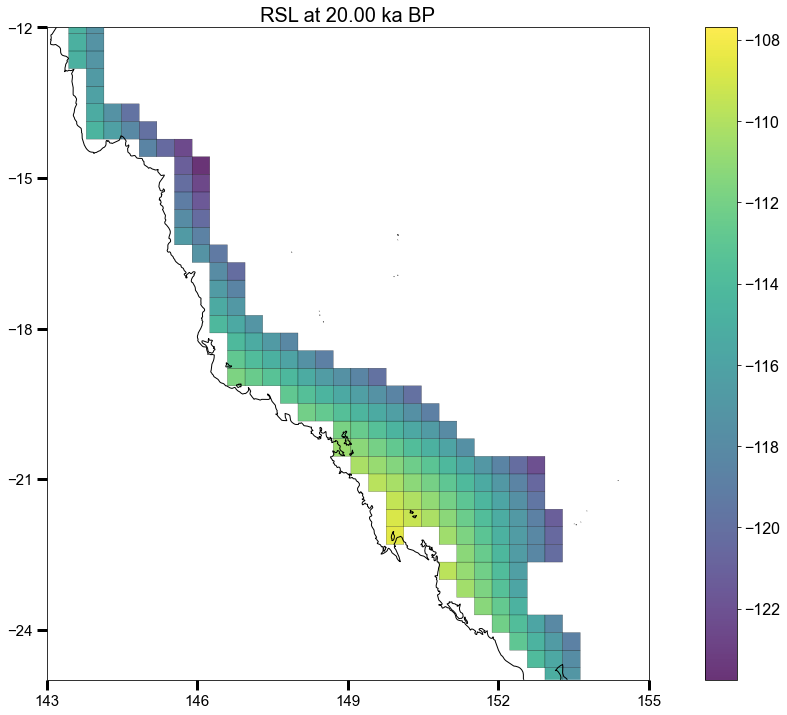

In [5]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

xx,yy = np.meshgrid(lon,lat)
time_index = 20 #to change the time, simply change index here, note the colormap 

im = ax.pcolor(xx,yy,f['RSL'][time_index],zorder=10,edgecolor='k',transform=ccrs.PlateCarree(),alpha=0.8)
fig.colorbar(im)
ax.set_title('RSL at {:5.2f} ka BP'.format(time[time_index]),fontsize=20)
plt.show();

## Impact of sediment isostatic adjustment (SIA)


- We provide relative sea-level (RSL) reconstruction across the Great Barrier Reef for two senarios - 1. GIA-only 2. GIA+SIA. To view the impact of SIA, simply substract GIA-only from GIA+SIA senario. 

- An example of visualizing SIA impact on mid-Holocene highstand is given below. 


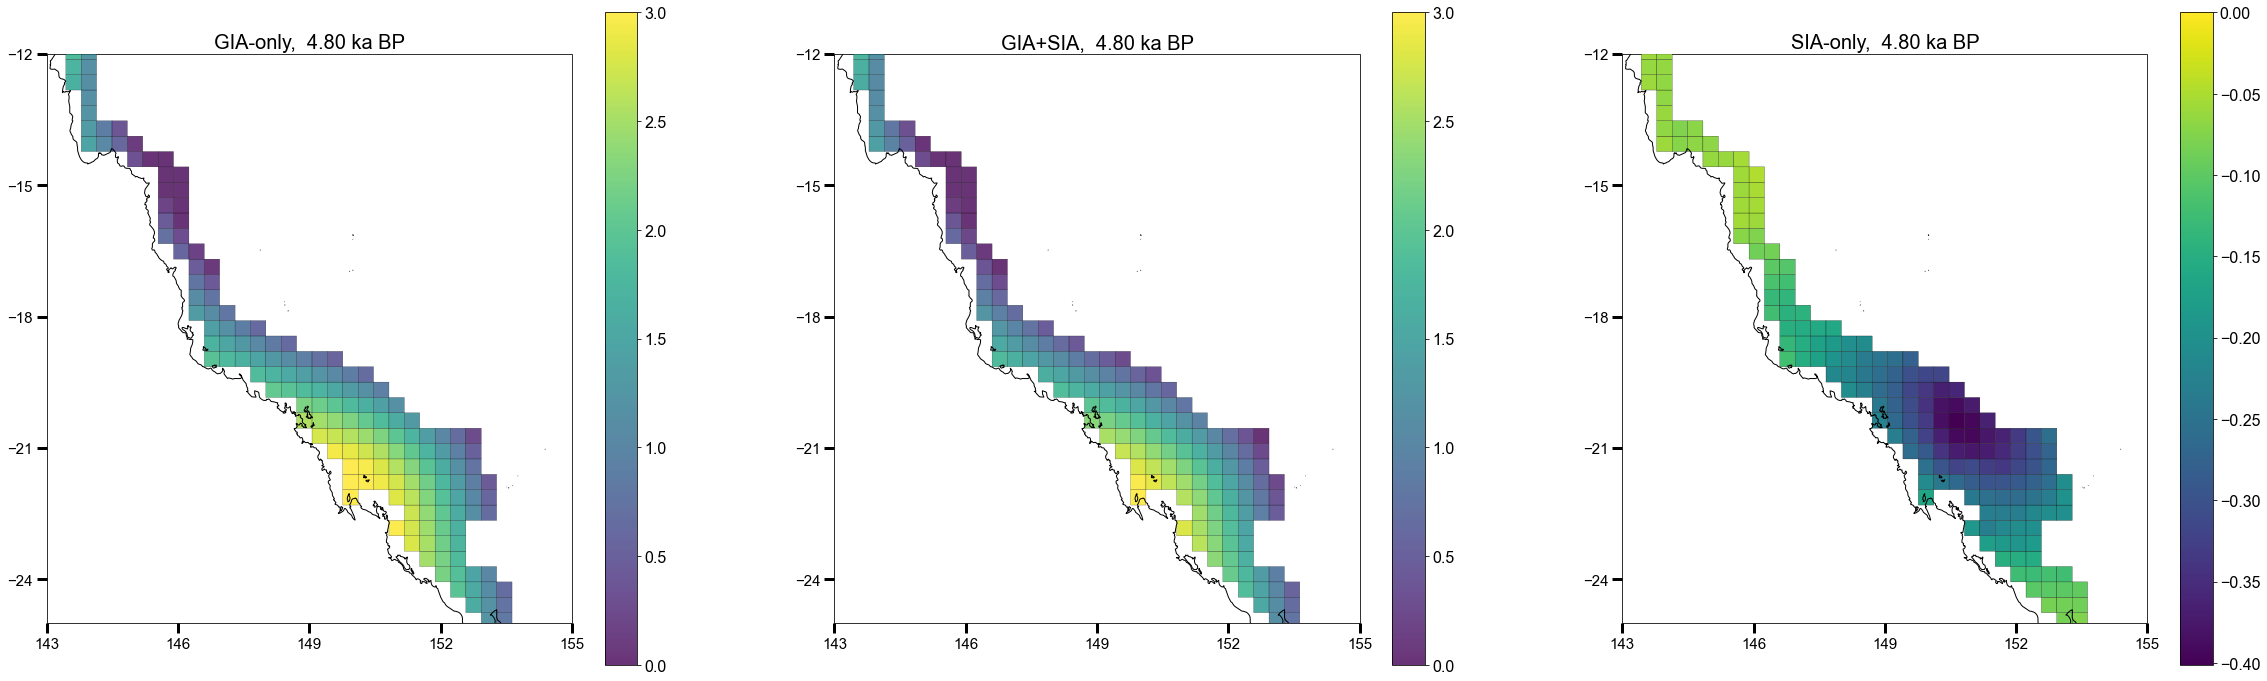

In [7]:
fig = plt.figure(figsize=(40,12))
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

xx,yy = np.meshgrid(lon,lat)
time= np.arange(28,-0.1,-0.4) 
time_index = 58 #to change the time, simply change index here, note the colormap 

im = ax.pcolor(xx,yy,f['GIA'][time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),alpha=0.8,vmin=0,vmax=3)
fig.colorbar(im)
ax.set_title('GIA-only, {:5.2f} ka BP'.format(time[time_index]),fontsize=20)


ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)
im = ax.pcolor(xx,yy,f['RSL'][time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),alpha=0.8,vmin=0,vmax=3)
fig.colorbar(im)
ax.set_title('GIA+SIA, {:5.2f} ka BP'.format(time[time_index]),fontsize=20)

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)
im = ax.pcolor(xx,yy,f['RSL'][time_index]-f['GIA'][time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),vmax=0)
fig.colorbar(im)
ax.set_title('SIA-only, {:5.2f} ka BP'.format(time[time_index]),fontsize=20)
plt.show()

## Reconstructed shoreline migration

- The coordiante of shoreline from 28 ka BP to present is given by variable shoreline, consisting of 71 time slices 

- Here we give an example of plotting Figure 5 in Lin et al., 2022.

- Note the background we use here is a default version for cartopy package, to use a high resolution background, checking this [blog page](http://earthpy.org/cartopy_backgroung.html).

In [11]:
#smooth the shoreline by moving average value
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

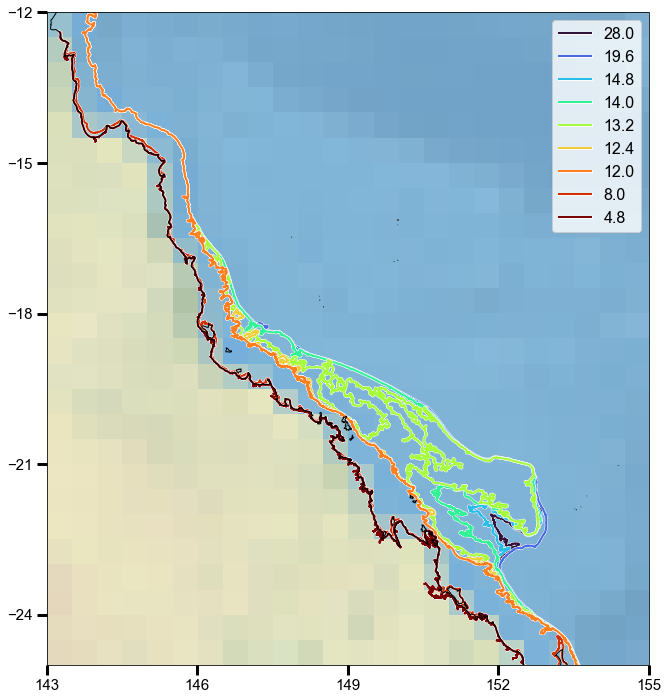

In [26]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)
ax.background_img()
n = 9 # showing 9 time slices 
colors = pl.cm.turbo(np.linspace(0,1,9)) # find corresponding color for each time slice
count = 0
time_slice_index =[0,21,33,35,37,39,40,50,58]
for i in time_slice_index:
    #print(interp_200_time[i])
    zero_index = shoreline[i,:,0]!=0
    average_x = moving_average(shoreline[i,:,0][zero_index],200)
    average_y = moving_average(shoreline[i,:,1][zero_index],200)
    ax.plot(shoreline[i,:,0][zero_index],shoreline[i,:,1][zero_index],color=colors[count],
            linewidth=2,
            path_effects=[pe.Stroke(linewidth=3, foreground='snow'), pe.Normal()],label =np.round( time[i],2))
    count+=1
plt.legend()

## Reconstructed sediment deposition history

- There are four sediment domains - shelf edge reef, holocene reef, *Halimeda* bioherms and siliciclastic sediment 
- The ensemble mean sediment deposition history of each ensemble is provided as a npy file containing a 2d matrix 
- Each matrix has a shape of 204 x 141, corresponding to 204 grid cells and 141 time slices


In [68]:
#load reconstruced sedimetn histories
average_shelf_edge = np.load('Data/average_shelf_edge.npy')
average_holocene = np.load('Data/average_holocene.npy')
average_hali = np.load('Data/average_hali.npy')
average_si = np.load('Data/average_si.npy')
average_total = (average_shelf_edge+average_holocene+average_si+average_hali)

grid_co = np.load('Data/site_co.npy')
sed_time = np.arange(28,-0.001,-0.2)

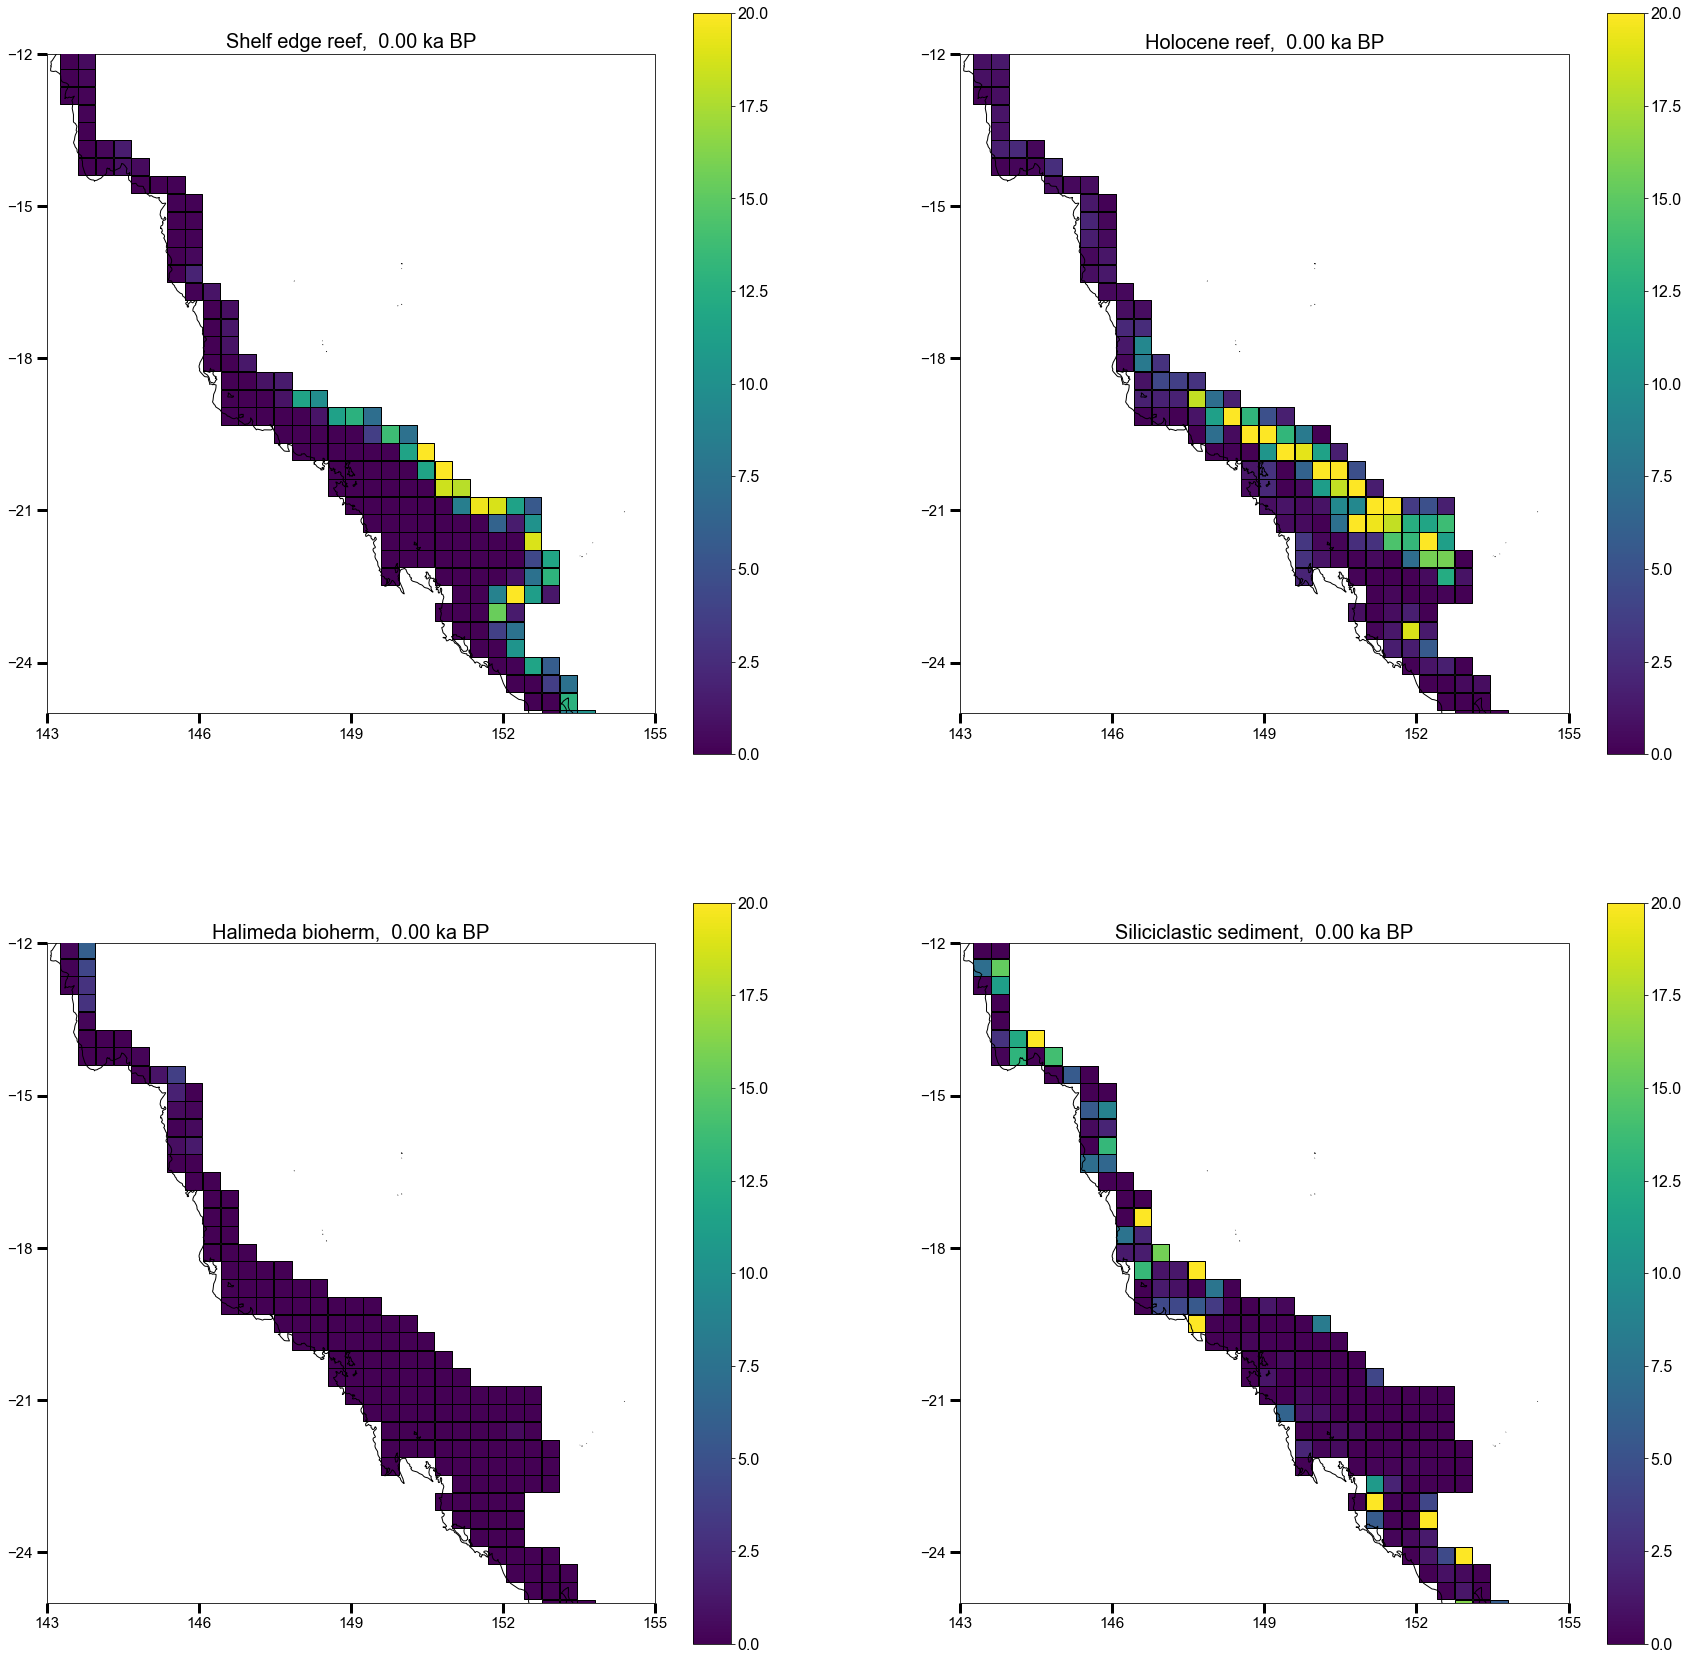

In [115]:
#spatial field
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)
 
time_index = 140 #to change the time, simply change index here, note the colormap 

im = ax.scatter(grid_co[:,1],grid_co[:,0],c= average_shelf_edge[:,time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),s=300,marker='s',vmax=20)
fig.colorbar(im)
ax.set_title('Shelf edge reef, {:5.2f} ka BP'.format(sed_time[time_index]),fontsize=20)

ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

im = ax.scatter(grid_co[:,1],grid_co[:,0],c= average_holocene[:,time_index],zorder=10
                ,edgecolor='k',transform=ccrs.PlateCarree(),s=300,marker='s',vmax=20)
fig.colorbar(im)
ax.set_title('Holocene reef, {:5.2f} ka BP'.format(sed_time[time_index]),fontsize=20)

ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

im = ax.scatter(grid_co[:,1],grid_co[:,0],c= average_hali[:,time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),s=300,marker='s',vmax=20)
fig.colorbar(im)
ax.set_title('Halimeda bioherm, {:5.2f} ka BP'.format(sed_time[time_index]),fontsize=20)

ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax.coastlines('10m',zorder=20)
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

ax.set_extent([143,155,-12, -25])
ax.set_xticks([143,146,149,152,155], crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-12,-25,-3), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=15,pad=4,which='major',direction='out',length=10,width=3)

im = ax.scatter(grid_co[:,1],grid_co[:,0],c= average_si[:,time_index],zorder=10,
              edgecolor='k',transform=ccrs.PlateCarree(),s=300,marker='s',vmax=20)
fig.colorbar(im)
ax.set_title('Siliciclastic sediment, {:5.2f} ka BP'.format(sed_time[time_index]),fontsize=20)


plt.show()

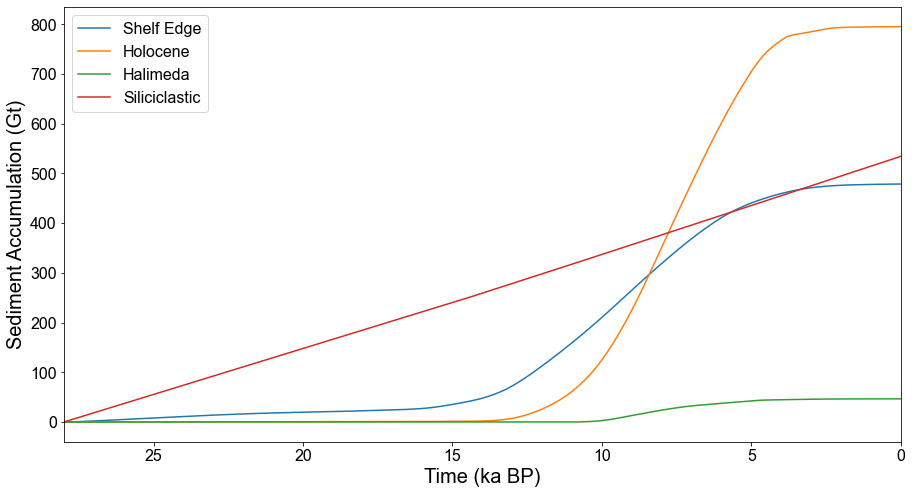

In [113]:
#temporal field
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.plot(sed_time,np.sum(average_shelf_edge,axis=0),label='Shelf Edge')
ax.plot(sed_time,np.sum(average_holocene,axis=0),label='Holocene')
ax.plot(sed_time,np.sum(average_hali,axis=0),label='Halimeda')
ax.plot(sed_time,np.sum(average_si,axis=0),label='Siliciclastic')
ax.legend()
ax.set_xlabel('Time (ka BP)',fontsize=20)
ax.set_ylabel('Sediment Accumulation (Gt)',fontsize=20)
plt.xlim(28,0)
plt.show()